GROUP MEMBERS:

Asad Karim -- 226063

Shweta Pandey -- 225964

In [0]:
import tensorflow as tf
import numpy as np

In [7]:
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.5268 - val_loss: 0.4577
Epoch 2/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.4260 - val_loss: 0.4066
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3957 - val_loss: 0.3880
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3781 - val_loss: 0.3718
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3635 - val_loss: 0.3590
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3521 - val_loss: 0.3491
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3433 - val_loss: 0.3415
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3366 - val_loss: 0.3356
Epoch 9/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3314 - val_loss: 0.3311
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

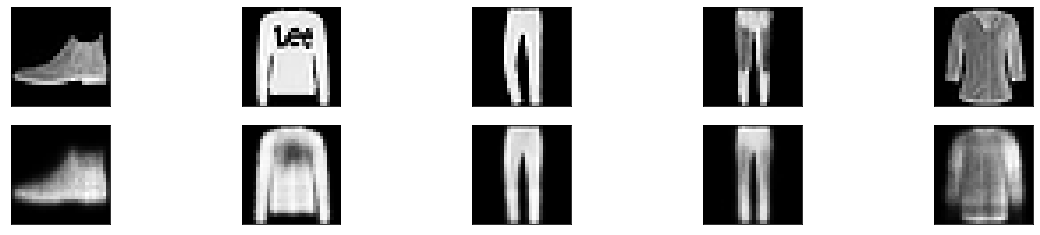

In [23]:
import matplotlib.pyplot as plt

n = 5  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [22]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2888 - val_loss: 0.2902
Epoch 2/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2878 - val_loss: 0.2895
Epoch 3/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2870 - val_loss: 0.2888
Epoch 4/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2862 - val_loss: 0.2883
Epoch 5/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2856 - val_loss: 0.2873
Epoch 6/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2850 - val_loss: 0.2870
Epoch 7/15
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2846 - val_loss: 0.2864
Epoch 8/15
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2841 - val_loss: 0.2862
Epoch 9/15
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2838 - val_loss: 0.2857
Epoch